In [18]:
        
import networkx as nx
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline


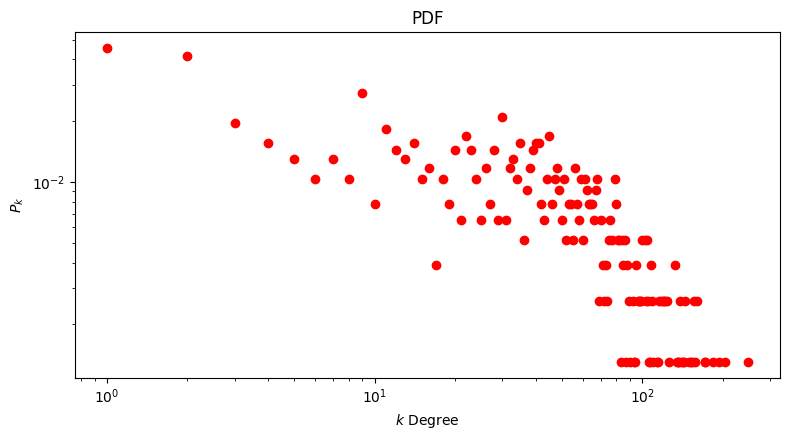

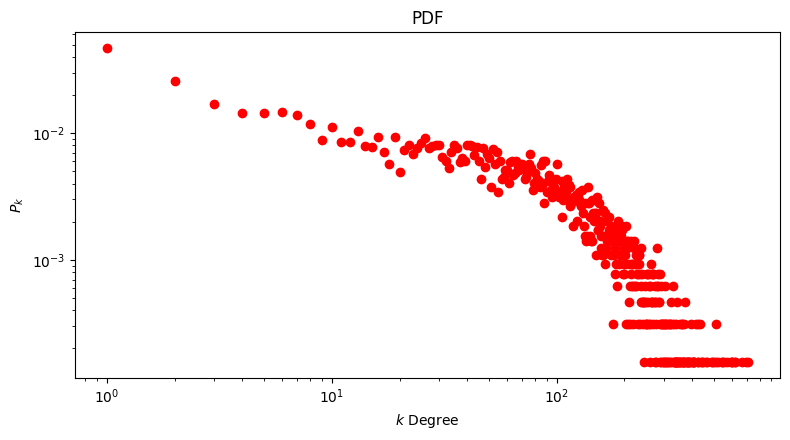

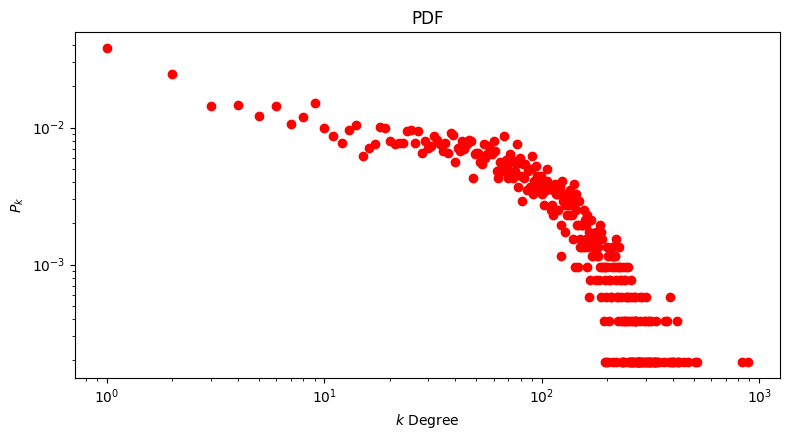

In [6]:

Gcaltech = nx.read_graphml("./fb100/Caltech36.graphml", node_type=int)
Gjohnshopkins = nx.read_graphml("./fb100/Johns Hopkins55.graphml", node_type=int)
Gmit = nx.read_graphml("./fb100/MIT8.graphml", node_type=int)

Graphs = [Gcaltech, Gmit, Gjohnshopkins]

for Graph in Graphs:
    degree = [v for k,v in dict(Graph.degree()).items()]
    distribution = [(elem, degree.count(elem)) for elem in sorted(set(degree))]
    k,pk = zip(*distribution)
    PDF = np.array(pk)/sum(pk)


    #
    # Plots 
    #
    fig, ax1 = plt.subplots(1, figsize=(16/2,9/2))
    ax1.loglog(k, PDF, 'ro')
    ax1.set_xlabel("$k$ Degree")
    ax1.set_ylabel("$P_k$")
    ax1.set_title("PDF")

    plt.savefig(f"./figures/ex2/distribution_{Graph}")
    fig.tight_layout()



In [3]:
Gcaltech = nx.read_graphml("./fb100/Caltech36.graphml", node_type=int)
Gjohnshopkins = nx.read_graphml("./fb100/Johns Hopkins55.graphml", node_type=int)
Gmit = nx.read_graphml("./fb100/MIT8.graphml", node_type=int)

Graphs = [Gcaltech, Gmit, Gjohnshopkins]

for Graph in Graphs:
    #print(nx.clustering(Graph))
    print(nx.average_clustering(Graph))
    print(nx.density(Graph))
          
    

0.40929439048517247
0.05640442132639792
0.2712187419501315
0.012118119495041378
0.26839307371293525
0.013910200162372396


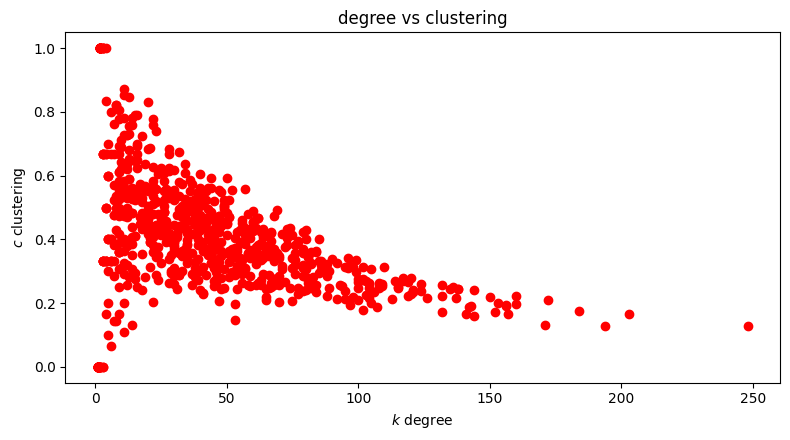

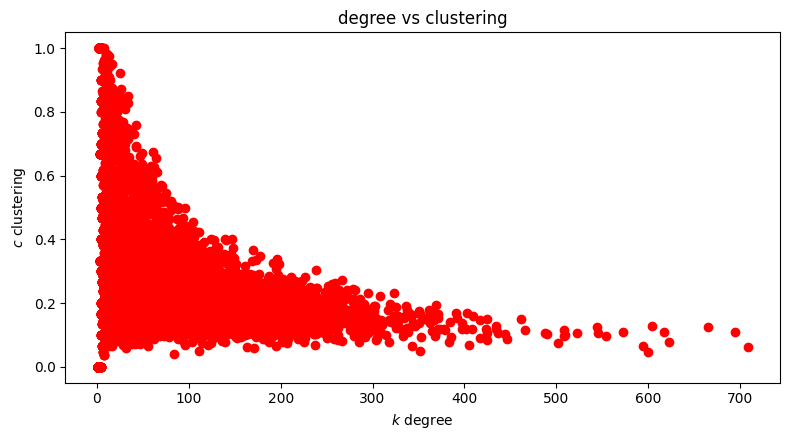

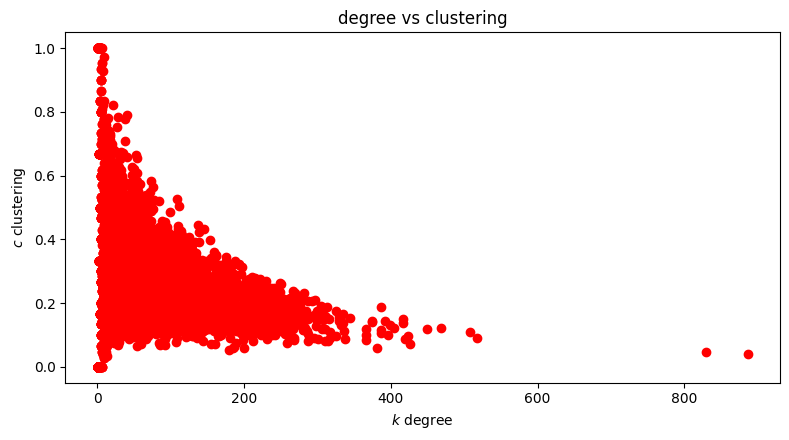

In [4]:
Gcaltech = nx.read_graphml("./fb100/Caltech36.graphml", node_type=int)
Gjohnshopkins = nx.read_graphml("./fb100/Johns Hopkins55.graphml", node_type=int)
Gmit = nx.read_graphml("./fb100/MIT8.graphml", node_type=int)

Graphs = [Gcaltech, Gmit, Gjohnshopkins]

for Graph in Graphs:
    clustering = []
    for n in Graph.nodes():
        clustering.append(nx.clustering(Graph, n))

    degree = [v for k,v in dict(Graph.degree()).items()]
    #degree = [(elem, degree.count(elem)) for elem in sorted(set(degree))]
    


    #
    # Plots 
    #
    fig, ax1 = plt.subplots(1, figsize=(16/2,9/2))
    ax1.plot(degree, clustering, 'ro')
    ax1.set_xlabel("$k$ degree")
    ax1.set_ylabel("$c$ clustering")
    ax1.set_title("degree vs clustering")

    plt.savefig(f"./figures/ex2/degree_clustering_{Graph}")
    fig.tight_layout()

In [23]:
from os import listdir
from os.path import isfile, join


size = []
assortativity_status = []
assortativity_major = []
#assortativity_vertexdegree = []
assortativity_dorm = []
assortativity_gender = []


for file in listdir("data"):
    
    path = join("data", file)
    Graph = nx.read_gml(path)

    size.append(Graph.number_of_nodes())
    assortativity_status.append(nx.attribute_assortativity_coefficient(Graph, "student_fac"))
    assortativity_major.append(nx.attribute_assortativity_coefficient(Graph, "major_index"))
    #assortativity_vertexdegree.append(nx.attribute_assortativity_coefficient(Graph, "degree"))
    assortativity_dorm.append(nx.attribute_assortativity_coefficient(Graph, "dorm"))
    assortativity_gender.append(nx.attribute_assortativity_coefficient(Graph, "gender"))
        


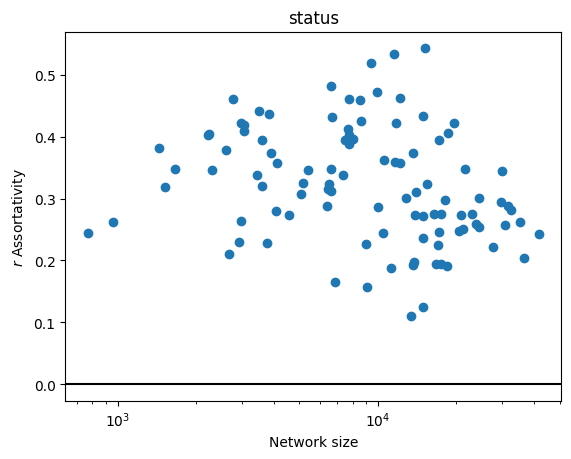

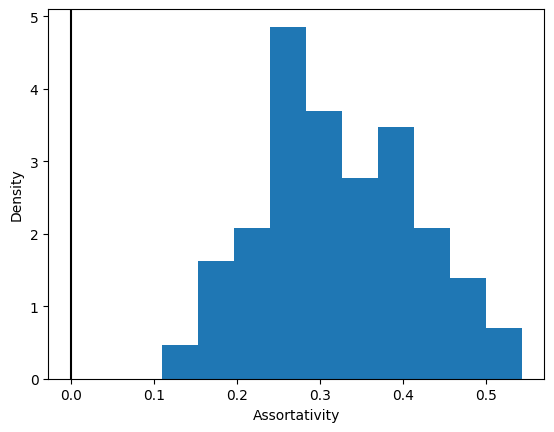

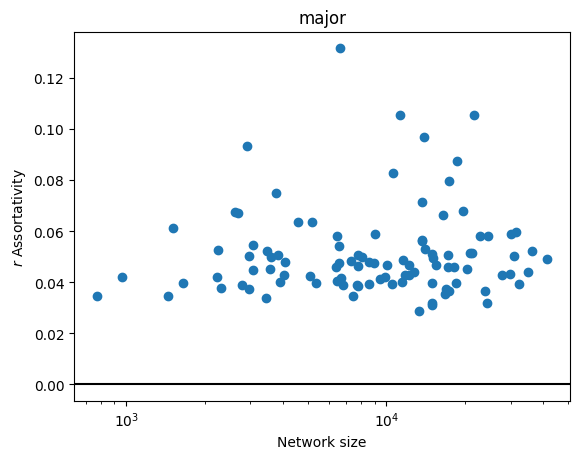

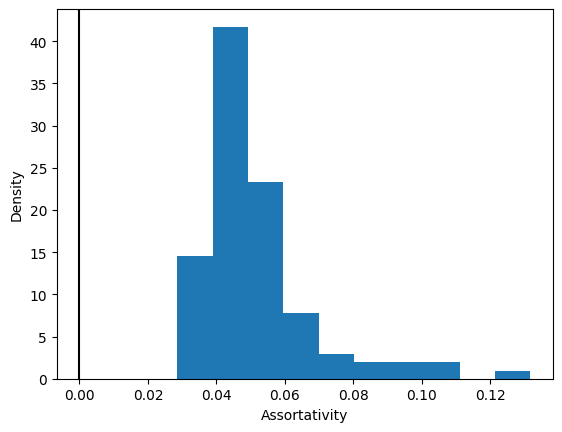

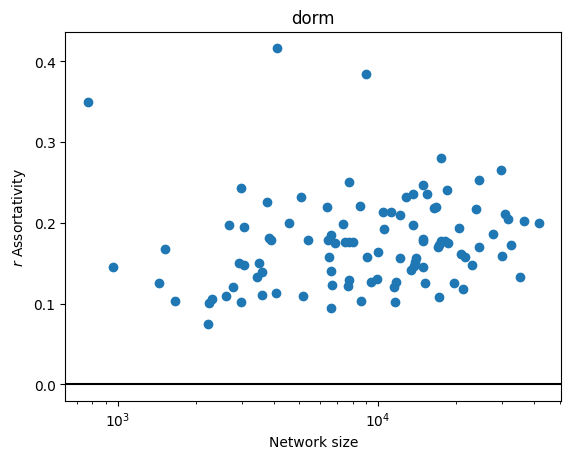

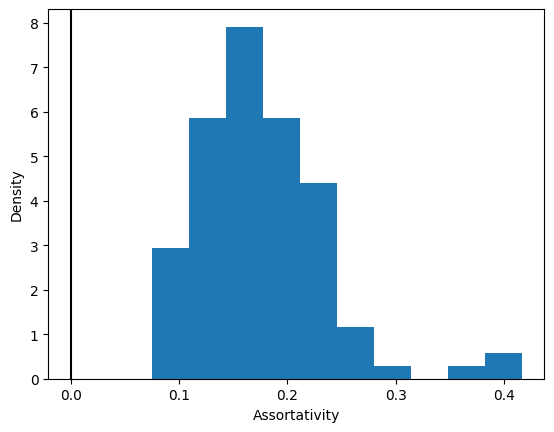

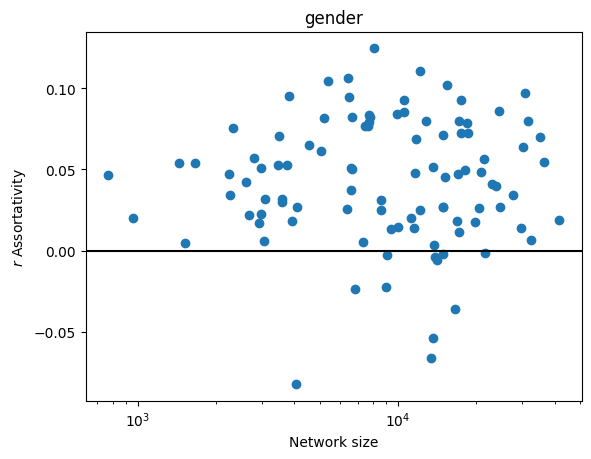

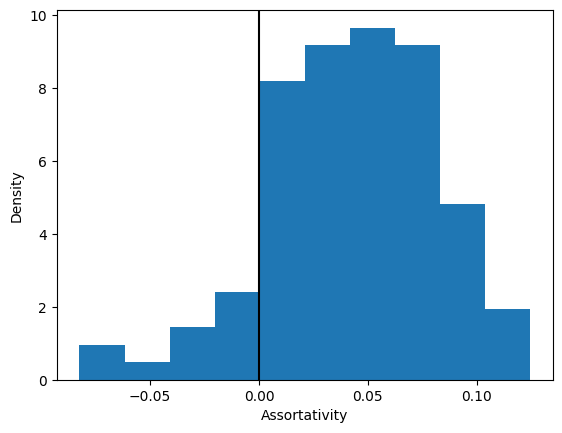

'\nax2.semilogx(size, assortativity_major, \'ro\')\nax2.axhline(y=0, color="black")\nax2.set_xlabel("Network size")\nax2.set_ylabel("$r$ Assortativity")\nax2.set_title("major")\nplt.hist(assortativity_major, bins=10, density=True)\nplt.xlabel("Assortativity")\nplt.ylabel("Density")\nplt.axvline(x=0, color="black")\n\n\nax4.semilogx(size, assortativity_dorm, \'ro\')\nax4.axhline(y=0, color="black")\nax4.set_xlabel("Network size")\nax4.set_ylabel("$r$ Assortativity")\nax4.set_title("dorm")\nplt.hist(assortativity_dorm, bins=10, density=True)\nplt.xlabel("Assortativity")\nplt.ylabel("Density")\nplt.axvline(x=0, color="black")\n\nax5.semilogx(size, assortativity_gender, \'ro\')\nax5.axhline(y=0, color="black")\nax5.set_xlabel("Network size")\nax5.set_ylabel("$r$ Assortativity")\nax5.set_title("gender")\nplt.hist(assortativity_gender, bins=10, density=True)\nplt.xlabel("Assortativity")\nplt.ylabel("Density")\nplt.axvline(x=0, color="black")\n\nplt.savefig("./figures/ex3")\nfig.tight_layout(

<Figure size 640x480 with 0 Axes>

In [27]:
  

#
# Plots 
#
#fig, ax1, ax2, ax3, ax4, ax5 = plt.subplots(1, 2, 3, 4, 5, figsize=(16/2,9/2))
plt.scatter(size, assortativity_status)
plt.xscale('log')
plt.xlabel("Network size")
plt.ylabel("$r$ Assortativity")
plt.axhline(y=0, color="black")
plt.title("status")
plt.show()
plt.savefig("./figures/ex3/status")

plt.hist(assortativity_status, bins=10, density=True)
plt.xlabel("Assortativity")
plt.ylabel("Density")
plt.axvline(x=0, color="black")
plt.show()
plt.savefig("./figures/ex3/status_density")

plt.scatter(size, assortativity_major)
plt.xscale('log')
plt.xlabel("Network size")
plt.ylabel("$r$ Assortativity")
plt.axhline(y=0, color="black")
plt.title("major")
plt.show()
plt.savefig("./figures/ex3/major")

plt.hist(assortativity_major, bins=10, density=True)
plt.xlabel("Assortativity")
plt.ylabel("Density")
plt.axvline(x=0, color="black")
plt.show()
plt.savefig("./figures/ex3/major_density")

plt.scatter(size, assortativity_dorm)
plt.xscale('log')
plt.xlabel("Network size")
plt.ylabel("$r$ Assortativity")
plt.axhline(y=0, color="black")
plt.title("dorm")
plt.show()
plt.savefig("./figures/ex3/dorm")

plt.hist(assortativity_dorm, bins=10, density=True)
plt.xlabel("Assortativity")
plt.ylabel("Density")
plt.axvline(x=0, color="black")
plt.show()
plt.savefig("./figures/ex3/dorm_density")

plt.scatter(size, assortativity_gender)
plt.xscale('log')
plt.xlabel("Network size")
plt.ylabel("$r$ Assortativity")
plt.axhline(y=0, color="black")
plt.title("gender")
plt.show()
plt.savefig("./figures/ex3/gender")

plt.hist(assortativity_gender, bins=10, density=True)
plt.xlabel("Assortativity")
plt.ylabel("Density")
plt.axvline(x=0, color="black")
plt.show()
plt.savefig("./figures/ex3/gender_density")



In [20]:
from abc import ABC
from abc import abstractmethod
import networkx as nx
import numpy as np
#import progressbar

class LinkPrediction ( ABC ) :
    
    def __init__ ( self , graph ) :
        """
        Constructor

        Parameters
        ----------
        graph : Networkx graph
        """
        self . graph = graph
        self . N = len ( graph )

    def neighbors ( self , v ) :
        """
        Return the neighbors list of a node

        Parameters
        ----------
        v : int
        node id

        Return
        ------
        neighbors_list : python list
        """
        neighbors_list = self . graph . neighbors ( v )
        return list ( neighbors_list )

    @abstractmethod
    def fit ( self ) :
        raise NotImplementedError ( " Fit must be implemented " )



In [21]:
class CommonNeighbors ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( CommonNeighbors , self ) . __init__ ( graph )

    def fit(self):
        score = np.zeros((self.N,self.N))
        for v in self.graph.nodes():
            #print(v)
            vneighbors = self.neighbors(v)
            
            for n in self.graph.nodes():
                if n != v:
                    nneighbors = self.neighbors(n)
                    intersection = [x for x in nneighbors if x in vneighbors]
                    score[v][n] = len(intersection)
            #print(score[v])
        
        return score
    
graph = nx.read_graphml("./fb100/Caltech36.graphml", node_type = int)
cn = CommonNeighbors(graph)
cn.fit()

array([[ 0., 11.,  3., ..., 28., 15., 21.],
       [11.,  0.,  0., ...,  5.,  5.,  3.],
       [ 3.,  0.,  0., ...,  4.,  1.,  0.],
       ...,
       [28.,  5.,  4., ...,  0., 10.,  2.],
       [15.,  5.,  1., ..., 10.,  0.,  0.],
       [21.,  3.,  0., ...,  2.,  0.,  0.]])

In [22]:

class Jaccard ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( Jaccard , self ) . __init__ ( graph )

    def fit(self):
        score = np.zeros((self.N,self.N))
        for v in nx.nodes(graph):
            vneighbors = self.neighbors(v)
            for n in self.graph.nodes():
                if n != v:
                    nneighbors = self.neighbors(n)
                    intersection = [x for x in nneighbors if x in vneighbors]
                    score[v][n] = len(intersection)/(len(nneighbors)+len(vneighbors)-len(intersection))
        
        return score

In [23]:
class AdamicAdar ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( AdamicAdar , self ) . __init__ ( graph )

    def fit(self):
        score = np.zeros((self.N,self.N))
        for v in nx.nodes(graph):
            vneighbors = self.neighbors(v)
            for n in self.graph.nodes():
                if n != v:
                    nneighbors = self.neighbors(n)
                    intersection = [x for x in nneighbors if x in vneighbors]
                    score[v][n] = 0
                    for z in intersection:
                        score[v][n] += 1/math.log(len(self.neighbors(z)))
        
        return score

In [24]:
from random import randint
import math
def remove(G):
    E = [e for e in G.edges()]
    
    C = G
    n = G.number_of_edges()
    i = 0
    max = math.floor(0.2*n)
    randarr = []
    Eremoved = []
    while i < max:
        rand = randint(0, n-1)
        if rand not in randarr:
            edge = E[rand]
            Eremoved.append(edge)
            #C.remove_edge(edge[0], edge[1])
            randarr.append(rand)
            
            i += 1
            
    return Eremoved



In [29]:
# Métrique de prédiction de liens : common neighbors

Gcaltech = nx.read_graphml("./fb100/Caltech36.graphml", node_type = int)

cn = CommonNeighbors(Gcaltech)
Eremoved = remove(cn.graph)

Score = cn.fit()

d = dict()
k=0
for i in range(len(Score)):
    for j in range(len(Score[i])):
        d[k]=(i, j)
        k += 1

fScore = Score.flatten()
sortedfScore = np.argsort(fScore)


argEpredict50 = sortedfScore[len(fScore)-50:]
#print(argEpredict50)
Epredict50 = []
for i in argEpredict50:
    Epredict50.append(d[i])
    
#print(Epredict50)
#print(Eremoved)
x_size50 = len([x for x in Eremoved if x in Epredict50])
top50 = (x_size50 / len(Epredict50))*100
recall50 = x_size50 / (x_size50 + len(Eremoved) - x_size50)
precision50 = x_size50 / (x_size50 + len(Epredict50) - x_size50)


argEpredict100 = sortedfScore[len(fScore)-100:]
Epredict100 = []
for i in argEpredict100:
    Epredict100.append(d[i])
    
x_size100 = len([x for x in Eremoved if x in Epredict100])
top100 = (x_size100 / len(Epredict100))*100
recall100 = x_size100 / (x_size100 + len(Eremoved) - x_size100)
precision100 = x_size100 / (x_size100 + len(Epredict100) - x_size100)


argEpredict200 = sortedfScore[len(fScore)-200:]
Epredict200 = []
for i in argEpredict200:
    Epredict200.append(d[i])
    
x_size200 = len([x for x in Eremoved if x in Epredict200])
top200 = (x_size200 / len(Epredict200))*100
recall200 = x_size200 / (x_size200 + len(Eremoved) - x_size200)
precision200 = x_size200 / (x_size200 + len(Epredict200) - x_size200)


argEpredict400 = sortedfScore[len(fScore)-400:]
Epredict400 = []
for i in argEpredict400:
    Epredict400.append(d[i])
    
x_size400 = len([x for x in Eremoved if x in Epredict400])
top400 = (x_size400 / len(Epredict400))*100
recall400 = x_size400 / (x_size400 + len(Eremoved) - x_size400)
precision400 = x_size400 / (x_size400 + len(Epredict400) - x_size400)


print(top50, top100, top200, top400)
print(recall50, recall100, recall200, recall400)
print(precision50, precision100, precision200, precision400)


8.0 10.0 9.0 9.5
0.0012008405884118883 0.003002101471029721 0.005403782647853498 0.011407985589912939
0.08 0.1 0.09 0.095


In [30]:
# Métrique de prédiction de liens : common neighbors

Gamerican = nx.read_graphml("./fb100/American75.graphml", node_type = int)

cn = CommonNeighbors(Gcaltech)
Eremoved = remove(cn.graph)

Score = cn.fit()

d = dict()
k=0
for i in range(len(Score)):
    for j in range(len(Score[i])):
        d[k]=(i, j)
        k += 1

fScore = Score.flatten()
sortedfScore = np.argsort(fScore)


argEpredict50 = sortedfScore[len(fScore)-50:]
#print(argEpredict50)
Epredict50 = []
for i in argEpredict50:
    Epredict50.append(d[i])
    
#print(Epredict50)
#print(Eremoved)
x_size50 = len([x for x in Eremoved if x in Epredict50])
top50 = (x_size50 / len(Epredict50))*100
recall50 = x_size50 / (x_size50 + len(Eremoved) - x_size50)
precision50 = x_size50 / (x_size50 + len(Epredict50) - x_size50)


argEpredict100 = sortedfScore[len(fScore)-100:]
Epredict100 = []
for i in argEpredict100:
    Epredict100.append(d[i])
    
x_size100 = len([x for x in Eremoved if x in Epredict100])
top100 = (x_size100 / len(Epredict100))*100
recall100 = x_size100 / (x_size100 + len(Eremoved) - x_size100)
precision100 = x_size100 / (x_size100 + len(Epredict100) - x_size100)


argEpredict200 = sortedfScore[len(fScore)-200:]
Epredict200 = []
for i in argEpredict200:
    Epredict200.append(d[i])
    
x_size200 = len([x for x in Eremoved if x in Epredict200])
top200 = (x_size200 / len(Epredict200))*100
recall200 = x_size200 / (x_size200 + len(Eremoved) - x_size200)
precision200 = x_size200 / (x_size200 + len(Epredict200) - x_size200)


argEpredict400 = sortedfScore[len(fScore)-400:]
Epredict400 = []
for i in argEpredict400:
    Epredict400.append(d[i])
    
x_size400 = len([x for x in Eremoved if x in Epredict400])
top400 = (x_size400 / len(Epredict400))*100
recall400 = x_size400 / (x_size400 + len(Eremoved) - x_size400)
precision400 = x_size400 / (x_size400 + len(Epredict400) - x_size400)


print(top50, top100, top200, top400)
print(recall50, recall100, recall200, recall400)
print(precision50, precision100, precision200, precision400)


12.0 15.0 10.5 8.75
0.0018012608826178324 0.004503152206544582 0.006304413089162414 0.010507355148604023
0.12 0.15 0.105 0.0875


In [31]:
# Métrique de prédiction de liens : Jaccard

Gcaltech = nx.read_graphml("./fb100/Caltech36.graphml", node_type = int)

cn = Jaccard(Gcaltech)
E_removed = remove(cn.graph)

Score = cn.fit()

d = dict()
k=0
for i in range(len(Score)):
    for j in range(len(Score[i])):
        d[k]=(i, j)
        k += 1

fScore = Score.flatten()
sortedfScore = np.argsort(fScore)


argEpredict50 = sortedfScore[len(fScore)-50:]
Epredict50 = []
for i in argEpredict50:
    Epredict50.append(d[i])
    
x_size50 = len([x for x in Eremoved if x in Epredict50])
top50 = (x_size50 / len(Epredict50))*100
recall50 = x_size50 / (x_size50 + len(Eremoved) - x_size50)
precision50 = x_size50 / (x_size50 + len(Epredict50) - x_size50)


argEpredict100 = sortedfScore[len(fScore)-100:]
Epredict100 = []
for i in argEpredict100:
    Epredict100.append(d[i])
    
x_size100 = len([x for x in Eremoved if x in Epredict100])
top100 = (x_size100 / len(Epredict100))*100
recall100 = x_size100 / (x_size100 + len(Eremoved) - x_size100)
precision100 = x_size100 / (x_size100 + len(Epredict100) - x_size100)


argEpredict200 = sortedfScore[len(fScore)-200:]
Epredict200 = []
for i in argEpredict200:
    Epredict200.append(d[i])
    
x_size200 = len([x for x in Eremoved if x in Epredict200])
top200 = (x_size200 / len(Epredict200))*100
recall200 = x_size200 / (x_size200 + len(Eremoved) - x_size200)
precision200 = x_size200 / (x_size200 + len(Epredict200) - x_size200)


argEpredict400 = sortedfScore[len(fScore)-400:]
Epredict400 = []
for i in argEpredict400:
    Epredict400.append(d[i])

x_size400 = len([x for x in Eremoved if x in Epredict400])
top400 = (x_size400 / len(Epredict400))*100
recall400 = x_size400 / (x_size400 + len(Eremoved) - x_size400)
precision400 = x_size400 / (x_size400 + len(Epredict400) - x_size400)


print(top50, top100, top200, top400)
print(recall50, recall100, recall200, recall400)
print(precision50, precision100, precision200, precision400)


4.0 10.0 6.5 8.5
0.0006004202942059442 0.003002101471029721 0.003902731912338637 0.01020714500150105
0.04 0.1 0.065 0.085


In [33]:
# Métrique de prédiction de liens : Jaccard

Gamerican = nx.read_graphml("./fb100/American75.graphml", node_type = int)

cn = Jaccard(Gamerican)
Eremoved = remove(cn.graph)

Score = cn.fit()

d = dict()
k=0
for i in range(len(Score)):
    for j in range(len(Score[i])):
        d[k]=(i, j)
        k += 1

fScore = Score.flatten()
sortedfScore = np.argsort(fScore)


argEpredict50 = sortedfScore[len(fScore)-50:]
#print(argEpredict50)
Epredict50 = []
for i in argEpredict50:
    Epredict50.append(d[i])
    
#print(Epredict50)
#print(Eremoved)
x_size50 = len([x for x in Eremoved if x in Epredict50])
top50 = (x_size50 / len(Epredict50))*100
recall50 = x_size50 / (x_size50 + len(Eremoved) - x_size50)
precision50 = x_size50 / (x_size50 + len(Epredict50) - x_size50)


argEpredict100 = sortedfScore[len(fScore)-100:]
Epredict100 = []
for i in argEpredict100:
    Epredict100.append(d[i])
    
x_size100 = len([x for x in Eremoved if x in Epredict100])
top100 = (x_size100 / len(Epredict100))*100
recall100 = x_size100 / (x_size100 + len(Eremoved) - x_size100)
precision100 = x_size100 / (x_size100 + len(Epredict100) - x_size100)


argEpredict200 = sortedfScore[len(fScore)-200:]
Epredict200 = []
for i in argEpredict200:
    Epredict200.append(d[i])
    
x_size200 = len([x for x in Eremoved if x in Epredict200])
top200 = (x_size200 / len(Epredict200))*100
recall200 = x_size200 / (x_size200 + len(Eremoved) - x_size200)
precision200 = x_size200 / (x_size200 + len(Epredict200) - x_size200)


argEpredict400 = sortedfScore[len(fScore)-400:]
Epredict400 = []
for i in argEpredict400:
    Epredict400.append(d[i])
    
x_size400 = len([x for x in Eremoved if x in Epredict400])
top400 = (x_size400 / len(Epredict400))*100
recall400 = x_size400 / (x_size400 + len(Eremoved) - x_size400)
precision400 = x_size400 / (x_size400 + len(Epredict400) - x_size400)


print(top50, top100, top200, top400)
print(recall50, recall100, recall200, recall400)
print(precision50, precision100, precision200, precision400)


12.0 7.000000000000001 9.0 10.25
0.00013782964256179363 0.00016080124965542588 0.0004134889276853809 0.000941835890838923
0.12 0.07 0.09 0.1025


In [32]:
# Métrique de prédiction de liens : Adamic/ Adar

Gcaltech = nx.read_graphml("./fb100/Caltech36.graphml", node_type = int)

cn = AdamicAdar(Gcaltech)
E_removed = remove(cn.graph)

Score = cn.fit()

d = dict()
k=0
for i in range(len(Score)):
    for j in range(len(Score[i])):
        d[k]=(i, j)
        k += 1

fScore = Score.flatten()
sortedfScore = np.argsort(fScore)


argEpredict50 = sortedfScore[len(fScore)-50:]
Epredict50 = []
for i in argEpredict50:
    Epredict50.append(d[i])
    
x_size50 = len([x for x in Eremoved if x in Epredict50])
top50 = (x_size50 / len(Epredict50))*100
recall50 = x_size50 / (x_size50 + len(Eremoved) - x_size50)
precision50 = x_size50 / (x_size50 + len(Epredict50) - x_size50)


argEpredict100 = sortedfScore[len(fScore)-100:]
Epredict100 = []
for i in argEpredict100:
    Epredict100.append(d[i])
    
x_size100 = len([x for x in Eremoved if x in Epredict100])
top100 = (x_size100 / len(Epredict100))*100
recall100 = x_size100 / (x_size100 + len(Eremoved) - x_size100)
precision100 = x_size100 / (x_size100 + len(Epredict100) - x_size100)


argEpredict200 = sortedfScore[len(fScore)-200:]
Epredict200 = []
for i in argEpredict200:
    Epredict200.append(d[i])
    
x_size200 = len([x for x in Eremoved if x in Epredict200])
top200 = (x_size200 / len(Epredict200))*100
recall200 = x_size200 / (x_size200 + len(Eremoved) - x_size200)
precision200 = x_size200 / (x_size200 + len(Epredict200) - x_size200)


argEpredict400 = sortedfScore[len(fScore)-400:]
Epredict400 = []
for i in argEpredict400:
    Epredict400.append(d[i])
    
x_size400 = len([x for x in Eremoved if x in Epredict400])
top400 = (x_size400 / len(Epredict400))*100
recall400 = x_size400 / (x_size400 + len(Eremoved) - x_size400)
precision400 = x_size400 / (x_size400 + len(Epredict400) - x_size400)


print(top50, top100, top200, top400)
print(recall50, recall100, recall200, recall400)
print(precision50, precision100, precision200, precision400)


12.0 13.0 10.0 8.5
0.0018012608826178324 0.003902731912338637 0.006004202942059442 0.01020714500150105
0.12 0.13 0.1 0.085


In [35]:
# Métrique de prédiction de liens : Adamic/ Adar

Gamerican = nx.read_graphml("./fb100/American75.graphml", node_type = int)

cn = AdamicAdar(Gamerican)
Eremoved = remove(cn.graph)

Score = cn.fit()

d = dict()
k=0
for i in range(len(Score)):
    for j in range(len(Score[i])):
        d[k]=(i, j)
        k += 1

fScore = Score.flatten()
sortedfScore = np.argsort(fScore)


argEpredict50 = sortedfScore[len(fScore)-50:]
#print(argEpredict50)
Epredict50 = []
for i in argEpredict50:
    Epredict50.append(d[i])
    
#print(Epredict50)
#print(Eremoved)
x_size50 = len([x for x in Eremoved if x in Epredict50])
top50 = (x_size50 / len(Epredict50))*100
recall50 = x_size50 / (x_size50 + len(Eremoved) - x_size50)
precision50 = x_size50 / (x_size50 + len(Epredict50) - x_size50)


argEpredict100 = sortedfScore[len(fScore)-100:]
Epredict100 = []
for i in argEpredict100:
    Epredict100.append(d[i])
    
x_size100 = len([x for x in Eremoved if x in Epredict100])
top100 = (x_size100 / len(Epredict100))*100
recall100 = x_size100 / (x_size100 + len(Eremoved) - x_size100)
precision100 = x_size100 / (x_size100 + len(Epredict100) - x_size100)


argEpredict200 = sortedfScore[len(fScore)-200:]
Epredict200 = []
for i in argEpredict200:
    Epredict200.append(d[i])
    
x_size200 = len([x for x in Eremoved if x in Epredict200])
top200 = (x_size200 / len(Epredict200))*100
recall200 = x_size200 / (x_size200 + len(Eremoved) - x_size200)
precision200 = x_size200 / (x_size200 + len(Epredict200) - x_size200)


argEpredict400 = sortedfScore[len(fScore)-400:]
Epredict400 = []
for i in argEpredict400:
    Epredict400.append(d[i])
    
x_size400 = len([x for x in Eremoved if x in Epredict400])
top400 = (x_size400 / len(Epredict400))*100
recall400 = x_size400 / (x_size400 + len(Eremoved) - x_size400)
precision400 = x_size400 / (x_size400 + len(Epredict400) - x_size400)


print(top50, top100, top200, top400)
print(recall50, recall100, recall200, recall400)
print(precision50, precision100, precision200, precision400)


24.0 22.0 21.5 18.5
0.00027565928512358727 0.0005053753560599099 0.0009877791050261877 0.001699898924928788
0.24 0.22 0.215 0.185
